Using the [dataset](https://sci2s.ugr.es/keel/dataset/data/imbalanced/cleveland-0_vs_4.zip) for the [risk of heart attack](https://sci2s.ugr.es/keel/dataset.php?cod=980) with class imbalance:

1. Create a logistic regression model and measure the performance of it.
2. By experimenting with different methods and class ratios; overcome class imbalance, determine the best performing method and class ratio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

In [2]:
df = pd.read_csv('cleveland-0_vs_4.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,negative
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,negative
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,negative
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,negative
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,negative


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    object 
 12  thal      177 non-null    object 
 13  num       177 non-null    object 
dtypes: float64(11), object(3)
memory usage: 19.5+ KB


In [4]:
df['ca'].unique()

array(['0.0', '2.0', '1.0', '3.0', '<null>'], dtype=object)

In [5]:
df['ca'].value_counts()

0.0       133
1.0        24
2.0         9
3.0         8
<null>      3
Name: ca, dtype: int64

In [6]:
df['ca'].replace({'<null>':'0.0'}, inplace=True)
df['ca'] = df['ca'].astype('float')

In [7]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '<null>'], dtype=object)

In [8]:
df['thal'].value_counts()

3.0       131
7.0        37
6.0         8
<null>      1
Name: thal, dtype: int64

In [9]:
df['thal'].replace({'<null>':'3.0'}, inplace=True)
df['thal'] = df['thal'].astype('float')

In [10]:
df[df.columns[:-1]] = df[df.columns[:-1]].astype('int64')

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2,3,0,6,negative
1,37,1,3,130,250,0,0,187,0,3,3,0,3,negative
2,41,0,2,130,204,0,2,172,0,1,1,0,3,negative
3,56,1,2,120,236,0,0,178,0,0,1,0,3,negative
4,57,0,4,120,354,0,0,163,1,0,1,0,3,negative


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       177 non-null    int64 
 1   sex       177 non-null    int64 
 2   cp        177 non-null    int64 
 3   trestbps  177 non-null    int64 
 4   chol      177 non-null    int64 
 5   fbs       177 non-null    int64 
 6   restecg   177 non-null    int64 
 7   thalach   177 non-null    int64 
 8   exang     177 non-null    int64 
 9   oldpeak   177 non-null    int64 
 10  slope     177 non-null    int64 
 11  ca        177 non-null    int64 
 12  thal      177 non-null    int64 
 13  num       177 non-null    object
dtypes: int64(13), object(1)
memory usage: 19.5+ KB


In [13]:
df['num'].value_counts()

negative    164
positive     13
Name: num, dtype: int64

In [14]:
print("Ratio of 'negative': %{:.2f}".format(len(df[df['num'] == 'negative']) / len(df)*100))
print("Ratio of 'positive': %{:.2f}".format(len(df[df['num'] == 'positive']) / len(df)*100))

Ratio of 'negative': %92.66
Ratio of 'positive': %7.34


<AxesSubplot:xlabel='num', ylabel='count'>

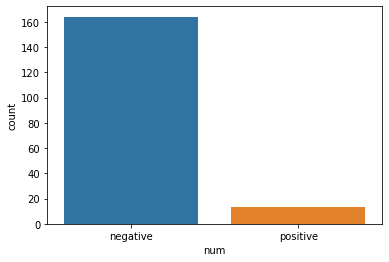

In [15]:
sns.countplot(x='num', data=df)

In [16]:
X = df.drop('num', axis=1)
y = df['num']

In [17]:
y.value_counts()

negative    164
positive     13
Name: num, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [19]:
lr = LogisticRegression(max_iter=10000)

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [20]:
print("Train Accuracy: {}".format(lr.score(X_train, y_train)))
print("Test Accuracy: {}".format(lr.score(X_test, y_test)))

Train Accuracy: 0.9915254237288136
Test Accuracy: 0.9661016949152542


# Changing Performance Measure Metric of Model

In [21]:
train_pred = lr.predict(X_train)
print("Train Dataset")
print(classification_report(y_train, train_pred))

print("Test Dataset")
print(classification_report(y_test, pred))

Train Dataset
              precision    recall  f1-score   support

    negative       1.00      0.99      1.00       109
    positive       0.90      1.00      0.95         9

    accuracy                           0.99       118
   macro avg       0.95      1.00      0.97       118
weighted avg       0.99      0.99      0.99       118

Test Dataset
              precision    recall  f1-score   support

    negative       0.96      1.00      0.98        55
    positive       1.00      0.50      0.67         4

    accuracy                           0.97        59
   macro avg       0.98      0.75      0.82        59
weighted avg       0.97      0.97      0.96        59



# Resampling Dataset

In [22]:
def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)

    pred_train = lr.predict(X_train)
    pred_test = lr.predict(X_test)
    
    print("Accuracy : {}\n".format(lr.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))

## Up-Sampling

In [23]:
negative = df[df['num'] == 'negative']
positive = df[df['num'] == 'positive']

In [24]:
positive_upsampled = resample(positive,
                              replace=True,
                              n_samples=len(negative),
                              random_state=42)

upsampled_df = pd.concat([negative, positive_upsampled])

upsampled_df['num'].value_counts()

positive    164
negative    164
Name: num, dtype: int64

In [25]:
X = upsampled_df.drop('num', axis=1)
y = upsampled_df['num']

In [26]:
create_model(X, y)

Accuracy : 0.9848484848484849

Train Dataset
              precision    recall  f1-score   support

    negative       1.00      0.97      0.98       131
    positive       0.97      1.00      0.98       131

    accuracy                           0.98       262
   macro avg       0.99      0.98      0.98       262
weighted avg       0.99      0.98      0.98       262

Test Dataset
              precision    recall  f1-score   support

    negative       1.00      0.97      0.98        33
    positive       0.97      1.00      0.99        33

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



## Down-Sampling

In [27]:
negative_downsampled = resample(negative,
                                replace=True,
                                n_samples=len(positive),
                                random_state=42)

downsampled_df = pd.concat([negative_downsampled, positive])

downsampled_df['num'].value_counts()

negative    13
positive    13
Name: num, dtype: int64

In [28]:
X = downsampled_df.drop('num', axis=1)
y = downsampled_df['num']

In [29]:
create_model(X, y)

Accuracy : 0.6666666666666666

Train Dataset
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        10
    positive       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Test Dataset
              precision    recall  f1-score   support

    negative       0.67      0.67      0.67         3
    positive       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6



# Producing Synthetic Samples

## SMOTE

In [30]:
X = df.drop('num', axis=1)
y = df['num']

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_sample(X, y)

In [31]:
create_model(X_smote, y_smote)

Accuracy : 0.9696969696969697

Train Dataset
              precision    recall  f1-score   support

    negative       0.97      0.93      0.95       131
    positive       0.93      0.97      0.95       131

    accuracy                           0.95       262
   macro avg       0.95      0.95      0.95       262
weighted avg       0.95      0.95      0.95       262

Test Dataset
              precision    recall  f1-score   support

    negative       1.00      0.94      0.97        33
    positive       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



## ADASYN

In [32]:
X = df.drop('num', axis=1)
y = df['num']

ad = ADASYN(random_state=27, sampling_strategy=1.0)
X_adasyn, y_adasyn = ad.fit_sample(X, y)

In [33]:
create_model(X_adasyn, y_adasyn)

Accuracy : 0.9393939393939394

Train Dataset
              precision    recall  f1-score   support

    negative       0.95      0.93      0.94       131
    positive       0.93      0.95      0.94       132

    accuracy                           0.94       263
   macro avg       0.94      0.94      0.94       263
weighted avg       0.94      0.94      0.94       263

Test Dataset
              precision    recall  f1-score   support

    negative       0.97      0.91      0.94        33
    positive       0.91      0.97      0.94        33

    accuracy                           0.94        66
   macro avg       0.94      0.94      0.94        66
weighted avg       0.94      0.94      0.94        66



**Up-Sampling** method gave best results.